## DTM Model Analysis

We will use simple measures on the DTM model to identify how topics in time periods relate to each other. 

In [2]:
from gensim.matutils import kullback_leibler
from gensim.matutils import jensen_shannon

In [3]:
import numpy as np
import spacy
import gensim
import csv
import pandas as pd

In [4]:
from gensim.models import LdaSeqModel
from gensim.corpora import Dictionary

In [5]:
ldaseq_fast = LdaSeqModel.load("ldaseq_rev_fast_32_14periods_CV001")

### DTM measures

DTM change measures (output of change in content between periods, list of most similar topics for each period) 

In [8]:
def parse_topic_string(topics, model):
    # takes the string returned by model.show_topics()
    # split on strings to get topics and the probabilities
    # list to store topic bows
    topics_bow = []
    for topic in topics:
        topic_bow = []
        for prob_word in topic:
            # split probability and word
            word, prob = prob_word
            # convert to word_type
            word = model.id2word.doc2bow([word])[0][0]
            topic_bow.append((word, float(prob)))
        topics_bow.append(topic_bow)
    return topics_bow

In [7]:
len(ldaseq_fast.id2word)

178872

In [10]:
a = ldaseq_fast.print_topics(top_terms=len(ldaseq_fast.id2word), time=4)

In [11]:
len(a)

32

In [12]:
topics = parse_topic_string(a, ldaseq_fast)

In [13]:
jensen_shannon(topics[0], topics[1])

0.44974565505981445

In [14]:
b = ldaseq_fast.print_topic_times(0, top_terms=len(ldaseq_fast.id2word))

In [15]:
len(b)

14

In [16]:
topics_time = parse_topic_string(b, ldaseq_fast)

In [18]:
topics_time

[[(606, 0.008239636135053859),
  (673, 0.006832837354842789),
  (254, 0.005127387412270029),
  (666, 0.004844258386827647),
  (215, 0.004679357118363254),
  (180, 0.004149386107517841),
  (6012, 0.004036921816430065),
  (2751, 0.0039120845525651045),
  (1345, 0.0036168415969656874),
  (2943, 0.0035705659958020653),
  (1041, 0.003445167623896114),
  (1876, 0.0034200232654052866),
  (2158, 0.0033604064749142275),
  (3177, 0.0032760016173484204),
  (612, 0.003254776376349343),
  (512, 0.0031496111121718548),
  (343, 0.003117082205322079),
  (1206, 0.0029263090611499065),
  (975, 0.0028454425623273697),
  (591, 0.002814506514266655),
  (46, 0.002795704818744837),
  (18645, 0.0027630220951826343),
  (668, 0.002761984763020163),
  (316, 0.0027535096094843535),
  (842, 0.0027400417965023722),
  (1113, 0.0025924069232609384),
  (5162, 0.0024654962576107177),
  (1673, 0.0024448577369781256),
  (1151, 0.0023704816835896274),
  (1047, 0.002348179238253735),
  (569, 0.002320425620341548),
  (2884,

In [19]:
jensen_shannon(topics_time[0], topics_time[1])

0.005121415946632624

In [20]:
all_topics_self_divergences = []

In [21]:
for i in range(0, 32):
    differences = []
    a = ldaseq_fast.print_topic_times(i, top_terms=len(ldaseq_fast.id2word))
    topics_time = parse_topic_string(a, ldaseq_fast)
    for j in range(0, 13):
        difference = jensen_shannon(topics_time[j], topics_time[j + 1])
        differences.append(difference)
    all_topics_self_divergences.append(differences)

In [22]:
all_topics_self_divergences

[[0.005121415946632624,
  0.007619659416377544,
  0.009096273221075535,
  0.007131761405616999,
  0.005484003573656082,
  0.005158115178346634,
  0.005579830147325993,
  0.01739301159977913,
  0.017248554155230522,
  0.006458715535700321,
  0.006380128674209118,
  0.011006547138094902,
  0.009559109807014465],
 [0.01032109186053276,
  0.00942913442850113,
  0.012757167220115662,
  0.011092627421021461,
  0.006451048888266087,
  0.005004819482564926,
  0.00604483624920249,
  0.017974156886339188,
  0.02080618590116501,
  0.005750936456024647,
  0.007580877281725407,
  0.012929919175803661,
  0.008466910570859909],
 [0.002935567405074835,
  0.0063676536083221436,
  0.015829991549253464,
  0.018444523215293884,
  0.008348148316144943,
  0.005267072003334761,
  0.007967004552483559,
  0.025406405329704285,
  0.03362341597676277,
  0.013616401702165604,
  0.014407680369913578,
  0.025127321481704712,
  0.013487530872225761],
 [0.011629227548837662,
  0.012139024212956429,
  0.01102645322680

In [24]:
import matplotlib.pyplot as plt

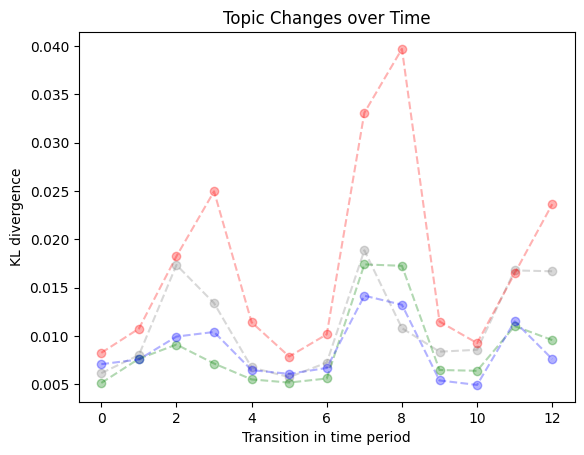

In [40]:
plt.plot(range(0, 13), all_topics_self_divergences[14], 'o--', color='grey', alpha=0.3)
plt.plot(range(0, 13), all_topics_self_divergences[0], 'o--', color='green', alpha=0.3)
plt.plot(range(0, 13), all_topics_self_divergences[21], 'o--', color='red', alpha=0.3)
plt.plot(range(0, 13), all_topics_self_divergences[5], 'o--', color='blue', alpha=0.3)
plt.title("Topic Changes over Time")
plt.xlabel("Transition in time period")
plt.ylabel("KL divergence")
plt.show()

In [43]:
ldaseq_fast.sstats

array([[6.85305488e-04, 1.29735826e-04, 5.45027006e-05, ...,
        1.72403560e-04, 3.89293869e-04, 2.18429761e-04],
       [7.40200465e-05, 1.92258430e-06, 5.84377910e-47, ...,
        9.60950572e-48, 3.32462701e-47, 2.39548290e-06],
       [4.09141059e-15, 1.95132270e-15, 4.40833300e-15, ...,
        1.52857558e-15, 1.00051228e-15, 2.99326806e-15],
       ...,
       [3.15843000e-07, 1.38568593e-06, 4.63179654e-07, ...,
        3.84230725e-07, 6.46969762e-50, 9.63847067e-07],
       [1.49812778e-07, 5.32015166e-06, 5.71958284e-06, ...,
        2.16005893e-06, 6.94945193e-07, 1.62640192e-07],
       [1.34363580e-07, 5.31092183e-24, 1.70419234e-06, ...,
        3.78125525e-30, 2.27337980e-35, 5.59156346e-51]])

In [33]:
topic_avg_differences = {}

In [34]:
i = 0

In [35]:
for topic in all_topics_self_divergences:
    topic_avg_differences[i] = np.mean(topic)
    i += 1

In [36]:
topic_avg_differences

{0: 0.00871054813838922,
 1: 0.010354593217086334,
 2: 0.014679132029414177,
 3: 0.011550047076665439,
 4: 0.013795994974386234,
 5: 0.008527941930179413,
 6: 0.013962198657771716,
 7: 0.013747499503481846,
 8: 0.011130446568131447,
 9: 0.01181669060427409,
 10: 0.01334935211791442,
 11: 0.013796387741772028,
 12: 0.011915444396436214,
 13: 0.011201916119227042,
 14: 0.01111823066066091,
 15: 0.011822704476519274,
 16: 0.009985076908308726,
 17: 0.00895221191100203,
 18: 0.017046943951684695,
 19: 0.010565599605727654,
 20: 0.010643266069774445,
 21: 0.0173236821563198,
 22: 0.013564737585301582,
 23: 0.01776855016270509,
 24: 0.013104960608940858,
 25: 0.009610893348088631,
 26: 0.016369748681497116,
 27: 0.00929236265185934,
 28: 0.010700439102947712,
 29: 0.011569816225136701,
 30: 0.008830766247298855,
 31: 0.01564924121619417}

In [37]:
import operator

In [38]:
sorted_differences = sorted(topic_avg_differences.items(), key=operator.itemgetter(1))

In [39]:
sorted_differences

[(5, 0.008527941930179413),
 (0, 0.00871054813838922),
 (30, 0.008830766247298855),
 (17, 0.00895221191100203),
 (27, 0.00929236265185934),
 (25, 0.009610893348088631),
 (16, 0.009985076908308726),
 (1, 0.010354593217086334),
 (19, 0.010565599605727654),
 (20, 0.010643266069774445),
 (28, 0.010700439102947712),
 (14, 0.01111823066066091),
 (8, 0.011130446568131447),
 (13, 0.011201916119227042),
 (3, 0.011550047076665439),
 (29, 0.011569816225136701),
 (9, 0.01181669060427409),
 (15, 0.011822704476519274),
 (12, 0.011915444396436214),
 (24, 0.013104960608940858),
 (10, 0.01334935211791442),
 (22, 0.013564737585301582),
 (7, 0.013747499503481846),
 (4, 0.013795994974386234),
 (11, 0.013796387741772028),
 (6, 0.013962198657771716),
 (2, 0.014679132029414177),
 (31, 0.01564924121619417),
 (26, 0.016369748681497116),
 (18, 0.017046943951684695),
 (21, 0.0173236821563198),
 (23, 0.01776855016270509)]

In [15]:
all_differences = []

In [16]:
for i in range(0, 32):
    differences = []
    for j in range(0, 32):
        differences.append(kullback_leibler(topics[i], topics[j]))
    all_differences.append(differences)

In [17]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt


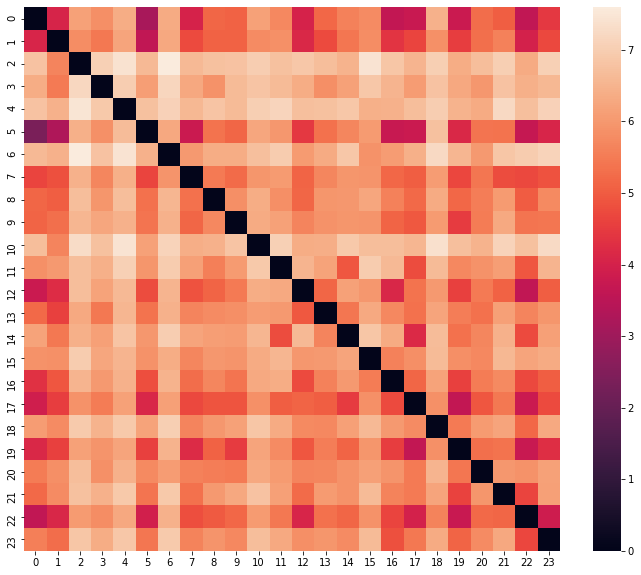

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))         # Sample figsize in inches
ax = sns.heatmap(all_differences)
# fig.savefig("time_period_4_topics_differences.pdf") 

Heatmap with just the one topic, compared to all others, but over the years.

In [20]:
all_differences[21]

[5.2117114,
 5.7628818,
 6.7590895,
 6.4570622,
 6.8906746,
 5.396666,
 6.9005413,
 5.3269863,
 6.009179,
 6.2889647,
 6.7767463,
 6.113381,
 5.237203,
 6.0327764,
 5.9016657,
 6.634595,
 5.6248345,
 5.4728746,
 6.219327,
 4.6150045,
 5.963487,
 0.0,
 4.655816,
 6.1372423]

## Finding Core Components

In [101]:
top_words = []

In [102]:
for topic in ldaseq_fast.print_topic_times(21, top_terms=100)[0:8]:
    top_words_topic = []
    for word_prob in topic:
        word, prob = word_prob
        top_words_topic.append(word)
    top_words.append(top_words_topic)

In [103]:
top_words

[['wohn',
  'wohnung',
  'miet',
  'foerder',
  'gefoerdert',
  'antraeg',
  'wohnbau',
  'hoeh',
  'wohnbaufoerder',
  'rahm',
  'stadterneuer',
  'betrag',
  'stadt',
  'darleh',
  'landesregier',
  'rund',
  'wwfsg',
  'wohnhaussanierungsgesetz',
  'wohnhaus',
  'vergeb',
  'beschluss',
  'wohnhaussanier',
  'gemeinnuetz',
  'erledigt',
  'eigenheim',
  'aktion',
  'annuitaetenzuschuss',
  'gewaehrt',
  'gesamtbetrag',
  'objekt',
  'mietrechtsgesetz',
  'berpruef',
  'schlichtungsstell',
  'beitrag',
  'land',
  'wohnbeihilf',
  'abteil',
  'sanier',
  'gewaehr',
  'million',
  'zusaetz',
  'erricht',
  'einschliess',
  'wohnhausanlag',
  'gestellt',
  'eur',
  'zuschuss',
  'berichtszeitraum',
  'positiv',
  'wirtschaft',
  'prozent',
  'vermiet',
  'erfolgt',
  'sockelsanier',
  'durchgefuehrt',
  'foerderungsmittel',
  'mrg',
  'angemess',
  'eigentuem',
  'nachtraeg',
  'divers',
  'zug',
  'gemeindewohn',
  'ausmass',
  'gebaeud',
  'mitteln',
  'zugesichert',
  'nutzflaech',


In [104]:
set.intersection(*map(set,top_words))


{'antraeg',
 'betrag',
 'einschliess',
 'gebaeud',
 'gemeinnuetz',
 'grund',
 'miet',
 'mitteln',
 'objekt',
 'schlichtungsstell',
 'stadt',
 'vergeb',
 'vermiet',
 'wohn',
 'wohnhaus',
 'wohnhausanlag',
 'wohnung'}

In [105]:
len(set.intersection(*map(set,top_words)))

17

## Topic Networks and Relationships in each time period

In [9]:
no_times = 14

In [10]:
topic_track = 21

In [11]:
differences_to_tracked_topic = []
for i in range(0, no_times):
    all_topics = parse_topic_string(ldaseq_fast.print_topics(top_terms=len(ldaseq_fast.id2word), time=i), ldaseq_fast)
    topic_to_track = all_topics[topic_track]
    differences = []
    for topic in all_topics:
        differences.append(kullback_leibler(topic_to_track, topic))
    differences_to_tracked_topic.append(differences)

In [12]:
average_differences = np.mean(np.array(differences_to_tracked_topic), axis=0)

In [13]:
average_differences

array([5.405247 , 6.361731 , 7.49065  , 6.9313807, 7.6237345, 5.7854185,
       7.358387 , 5.354065 , 6.637341 , 6.8755937, 7.2489552, 6.744452 ,
       5.8818603, 6.3633347, 6.352945 , 7.0728292, 6.160793 , 5.9215055,
       7.0489154, 5.6388793, 6.0366464, 0.       , 5.841974 , 6.9675484,
       5.5338173, 6.2826076, 6.7154307, 6.063903 , 5.551336 , 6.40041  ,
       6.9988275, 6.290196 ], dtype=float32)

In [14]:
np.argsort(average_differences)

array([21,  7,  0, 24, 28, 19,  5, 22, 12, 17, 20, 27, 16, 25, 31, 14,  1,
       13, 29,  8, 26, 11,  9,  3, 23, 30, 18, 15, 10,  6,  2,  4])

In [15]:
np.array(differences_to_tracked_topic).T

array([[4.99252  , 4.8610826, 4.8616786, 4.9794216, 5.2117114, 5.375442 ,
        5.3495474, 5.212859 , 5.1299615, 5.398772 , 5.6955643, 5.9189415,
        6.2132673, 6.472683 ],
       [5.1970153, 5.1471515, 5.226908 , 5.453006 , 5.7628818, 6.0299354,
        6.166415 , 6.180881 , 6.3344545, 6.9033427, 7.339294 , 7.5884776,
        7.868154 , 7.866313 ],
       [6.856683 , 6.7430086, 6.669381 , 6.653148 , 6.7590895, 6.9898076,
        7.0749164, 7.108724 , 7.2670145, 7.7512746, 8.226092 , 8.566233 ,
        8.953408 , 9.250328 ],
       [6.5813923, 6.455286 , 6.3360186, 6.352418 , 6.4570622, 6.571571 ,
        6.6103535, 6.5775294, 6.6348453, 6.984713 , 7.314909 , 7.6769776,
        8.050165 , 8.436086 ],
       [7.2004123, 7.0654182, 6.9271364, 6.8229513, 6.8906746, 7.0786653,
        7.0945144, 7.1515427, 7.4712925, 7.965909 , 8.34343  , 8.673563 ,
        9.005617 , 9.041157 ],
       [5.0905313, 5.0656953, 5.143972 , 5.2580147, 5.396666 , 5.608532 ,
        5.6163344, 5.5022864, 5

In [16]:
sorted_differences_tracked = np.array(differences_to_tracked_topic).T[np.argsort(average_differences)].T

In [17]:
np.argsort(average_differences)

array([21,  7,  0, 24, 28, 19,  5, 22, 12, 17, 20, 27, 16, 25, 31, 14,  1,
       13, 29,  8, 26, 11,  9,  3, 23, 30, 18, 15, 10,  6,  2,  4])

## Sorted heatmap of differences

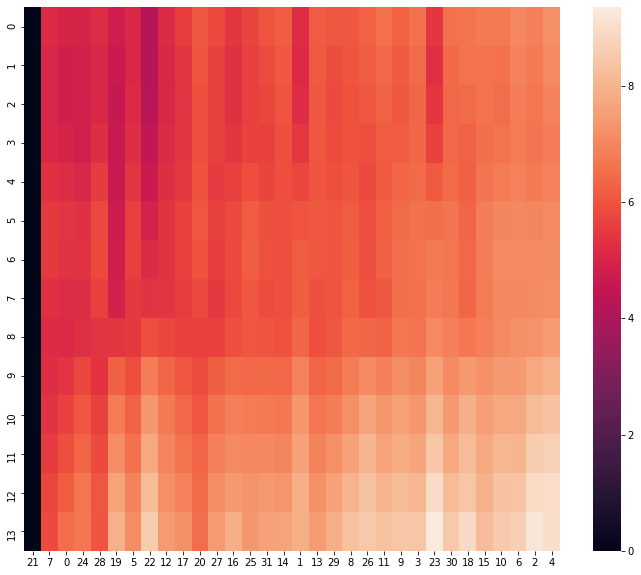

In [194]:
fig, ax = plt.subplots(figsize=(12, 10))         # Sample figsize in inches
ax = sns.heatmap(sorted_differences_tracked, xticklabels=np.argsort(average_differences))
# x-axis topic, y-axis time, and the heatmap score difference, time periods as years 
# TODO 

TODO: top 5 and bottom 5 for localised change exploration

In [6]:
import networkx as nx

In [193]:
import matplotlib.pyplot as plt

In [205]:
def print_graph_times(differences_to_topic, topic_to_track=21, time=0, l_threshold=5.45, n_topics =32):
    color_map = ['#f29898']
    G = nx.Graph()
    G.add_node(topic_to_track)
    for i in range(0, n_topics):
        if differences_to_topic[time][i] < l_threshold and i != topic_to_track :
            color_map.append('#dddddd')
            G.add_node(i)
            G.add_edge(topic_to_track, i, weight=differences_to_topic[time][i])
    
    plt.figure(figsize=(7,7))
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]
    avg = np.mean(weights)
    weights = np.power((avg / weights) + 0.25, 5.8)
    print(weights)
    
    close=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < l_threshold]
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=color_map)
    nx.draw_networkx_edges(G, pos, edgelist=close, width=weights, edge_color='#003B46')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    plt.savefig(str(time) + '_network.pdf')

[3.7315834 3.441483  3.1902604 4.834712  3.2907963 3.6686137]


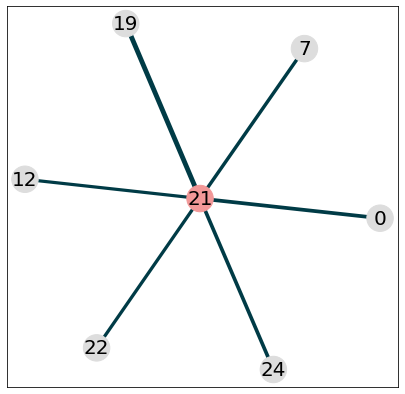

In [211]:
print_graph_times(differences_to_tracked_topic, time=7)

[4.1833825 3.9950976 3.2393973 3.6477757 3.294079 ]


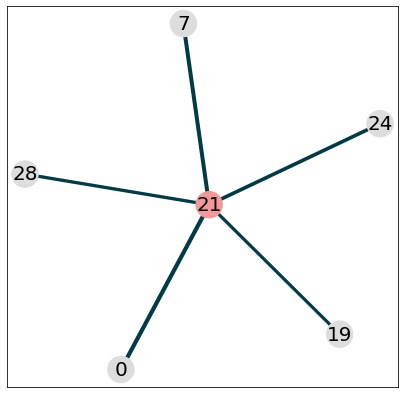

In [212]:
print_graph_times(differences_to_tracked_topic, time=8)

[3.475608  3.9379175 3.55169  ]


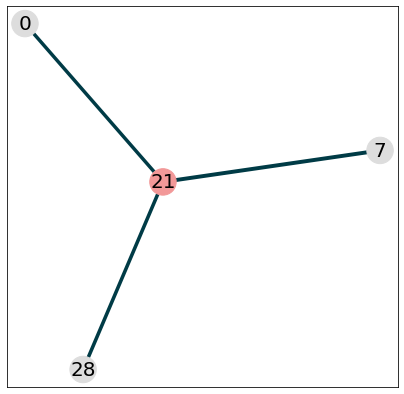

In [213]:
print_graph_times(differences_to_tracked_topic, time=9)

[4.285638  3.0626593 3.297125  3.5532238 3.3799548 2.834027  2.6249027
 5.5283237 7.9869018 2.604825  4.2652917 3.391179 ]


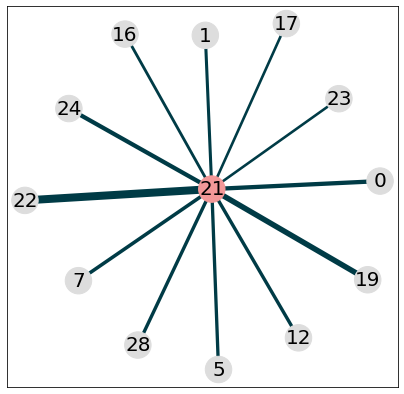

In [214]:
print_graph_times(differences_to_tracked_topic, time=2)

[3.9268596 3.0520697 3.4765835 3.2402403 2.624557  2.62268   5.6326594
 6.7163796 4.328121  3.0704787]


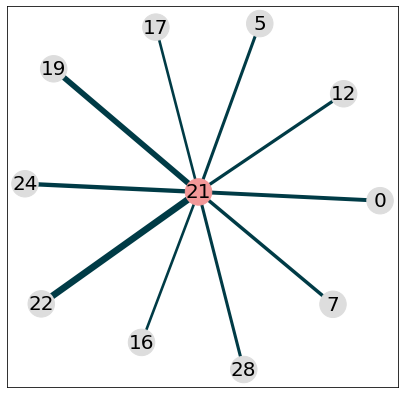

In [215]:
print_graph_times(differences_to_tracked_topic, time=3)

[3.223833  2.7461743 2.9148927 3.1520858 5.6890187 5.457367  3.6404896]


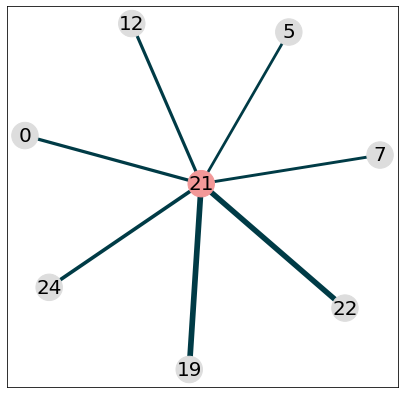

In [216]:
print_graph_times(differences_to_tracked_topic, time=4)

In [177]:
## print_graph_times(differences_to_tracked_topic, time=8)

In [208]:
# print_graph_times(differences_to_tracked_topic, time=13)

TODO: graph thickness or closeness for topics.

## Topics Change Over Time

In [36]:
def entropy_changes_time(topics_time):
    changes = []
    for i in range(0, len(topics_time) - 1):
        changes.append(kullback_leibler(topics_time[i], topics_time[i + 1]))
    return changes

In [37]:
topics_changes_time = {}

In [225]:
for i in range(25, 32):
    topics_time = ldaseq_fast.print_topic_times(i, top_terms=len(ldaseq_fast.id2word))
    topics_time = parse_topic_string(topics_time, ldaseq_fast)
    topics_changes_time[i] = entropy_changes_time(topics_time)

In [230]:
topics_time = ldaseq_fast.print_topic_times(24, top_terms=len(ldaseq_fast.id2word))
topics_time = parse_topic_string(topics_time, ldaseq_fast)
topics_changes_time[24] = entropy_changes_time(topics_time)

In [39]:
import seaborn as sns

In [229]:
topics_changes_time

{0: [0.02118819,
  0.030738425,
  0.03629164,
  0.029625827,
  0.02209599,
  0.020851891,
  0.022553364,
  0.07301176,
  0.07585188,
  0.026089018,
  0.025626993,
  0.046037603,
  0.03833799],
 1: [0.04568448,
  0.038896892,
  0.052812047,
  0.04464794,
  0.025894465,
  0.0200945,
  0.024333352,
  0.069821365,
  0.08113129,
  0.022855002,
  0.030164776,
  0.050891913,
  0.031207455],
 2: [0.011879276,
  0.025750214,
  0.06284664,
  0.07404477,
  0.034055986,
  0.020962367,
  0.03125077,
  0.096555896,
  0.1320783,
  0.054191396,
  0.058183454,
  0.09967108,
  0.05214816],
 3: [0.058208536,
  0.055284116,
  0.04681999,
  0.05084588,
  0.022146307,
  0.013882071,
  0.027836291,
  0.08094153,
  0.065921634,
  0.023228692,
  0.038185086,
  0.060966954,
  0.0692374],
 4: [0.02482475,
  0.02831376,
  0.05392513,
  0.09492515,
  0.03299909,
  0.024947863,
  0.044206463,
  0.13170709,
  0.108900815,
  0.02662704,
  0.024590613,
  0.0709155,
  0.053196013],
 5: [0.029104222,
  0.030784586,
  0.

In [223]:
import pandas as pd

In [231]:
pd.DataFrame.from_dict(topics_changes_time).to_csv("topics_change_time.csv")

wohnbaufoerder
zuschuss
foerder
fuersorg
sozial

### Lineplots of Change

https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [41]:
import matplotlib.pyplot as plt

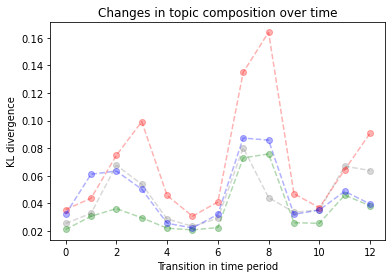

In [42]:
plt.plot(range(0, 13), topics_changes_time[14], 'o--', color='grey', alpha=0.3)
plt.plot(range(0, 13), topics_changes_time[0], 'o--', color='green', alpha=0.3)
plt.plot(range(0, 13), topics_changes_time[21], 'o--', color='red', alpha=0.3)
plt.plot(range(0, 13), topics_changes_time[9], 'o--', color='blue', alpha=0.3)
plt.title("Changes in topic composition over time")
plt.xlabel("Transition in time period")
plt.ylabel("KL divergence")
plt.show()

## Words that change the most

In [24]:
import operator

In [25]:
def tracking_change(topic_model, topic_num, first_time_period=0, second_time_period=4):
    
    topics_begin = topic_model.print_topics(time=first_time_period, top_terms=100)[topic_num]
    topics_end = topic_model.print_topics(time=second_time_period, top_terms=100)[topic_num]
    
    word_ranks_begin = {}
    word_ranks_end = {}
    word_change = {}
    words_begin, words_end = [], []
    
    for num, word_prob in enumerate(topics_begin):
        word, prob = word_prob
        word_ranks_begin[word] = num
        words_begin.append(word)
            
    for num, word_prob in enumerate(topics_end):
        word, prob = word_prob
        word_ranks_end[word] = num
        words_end.append(word)

    for word in words_begin:
        if word not in word_ranks_end:
            word_ranks_end[word] = 21
    
    for word in words_end:
        if word not in word_ranks_begin:
            word_ranks_begin[word] = 21
    
    all_words = list(set(words_begin) | set(words_end)) 
    
    for word in all_words:
        word_change[word] = word_ranks_begin[word] - word_ranks_end[word]

    
    sorted_word_change = sorted(word_change.items(), key=operator.itemgetter(1))
    
    sorted_word_change.reverse()
    
    return sorted_word_change
                                                                    

In [36]:
tracking_change(ldaseq_fast, 21, first_time_period=2, second_time_period=3)

[('wohnungswes', 83),
 ('partei', 77),
 ('wohnhaussanier', 75),
 ('mrg', 74),
 ('eigenheim', 72),
 ('gesamtbaukost', 71),
 ('inanspruchnahm', 68),
 ('mietengesetz', 68),
 ('ueberprueft', 67),
 ('zug', 64),
 ('landesregier', 63),
 ('positiv', 62),
 ('kam', 60),
 ('privat', 59),
 ('grossteil', 59),
 ('nahm', 58),
 ('vergab', 57),
 ('durchgefuehrt', 56),
 ('veraeusser', 55),
 ('annuitaetenzuschuss', 54),
 ('raeumung', 54),
 ('kost', 47),
 ('neubaut', 47),
 ('haus', 47),
 ('wohnhauserverwalt', 45),
 ('aussenstell', 45),
 ('beantragt', 43),
 ('zusaetz', 42),
 ('foerderungsaktion', 40),
 ('handelt', 37),
 ('zahl', 37),
 ('althaus', 36),
 ('wohnungsverbesser', 34),
 ('stadterneuer', 33),
 ('verwalt', 31),
 ('abgang', 31),
 ('gestellt', 29),
 ('kredit', 27),
 ('heim', 25),
 ('baukostenbeitrag', 23),
 ('wohn', 23),
 ('wohnhausanlag', 20),
 ('wohnungsverbesserungsgesetz', 19),
 ('gebaeud', 18),
 ('grund', 18),
 ('gemeindewohn', 17),
 ('dienststell', 15),
 ('mitteln', 14),
 ('oesterreich', 11),
 

In [37]:
tracking_change(ldaseq_fast, 21, first_time_period=3, second_time_period=4)

[('erhoeh', 77),
 ('wohnbaufond', 75),
 ('ausmass', 73),
 ('dienstwohn', 72),
 ('kleingartenwes', 71),
 ('lokal', 71),
 ('mietobjekt', 70),
 ('quadratmet', 69),
 ('aktion', 68),
 ('erfolgt', 61),
 ('wirtschaft', 58),
 ('bauvorhab', 57),
 ('mittel', 55),
 ('gesamtbetrag', 53),
 ('fond', 51),
 ('zugesichert', 50),
 ('angemess', 48),
 ('jurist', 48),
 ('wohnungswerb', 47),
 ('zugang', 47),
 ('hauseigentuem', 45),
 ('wohnbau', 43),
 ('kreditaktion', 42),
 ('baukost', 41),
 ('bgbl', 41),
 ('oesterreich', 39),
 ('zuschlaeg', 38),
 ('abgang', 36),
 ('erledigt', 35),
 ('bau', 34),
 ('baut', 33),
 ('nutzflaech', 32),
 ('wohnbeihilf', 31),
 ('jahres', 30),
 ('wohnungseigentum', 29),
 ('zentral', 28),
 ('rund', 27),
 ('kuendig', 26),
 ('gebaeud', 26),
 ('baukostenbeitrag', 25),
 ('verwaltet', 25),
 ('befind', 25),
 ('erricht', 24),
 ('neubaut', 24),
 ('gefoerdert', 23),
 ('nachtraeg', 21),
 ('privat', 17),
 ('haus', 15),
 ('rahm', 14),
 ('land', 12),
 ('zahl', 9),
 ('amtsgebaeud', 9),
 ('grund', 

In [38]:
tracking_change(ldaseq_fast, 21, first_time_period=7, second_time_period=8)

[('mietengesetz', 78),
 ('ertrag', 77),
 ('statist', 76),
 ('mietvertraeg', 74),
 ('verwaltet', 73),
 ('wirtschaft', 72),
 ('ergebnis', 71),
 ('eingebracht', 68),
 ('siedlungshaus', 67),
 ('ybbsruech', 66),
 ('gesellschaft', 64),
 ('zubaut', 61),
 ('jahres', 60),
 ('wohnhausbaut', 59),
 ('kuendig', 58),
 ('benuetzungsbewill', 57),
 ('ersatzvornahm', 56),
 ('schlichtungsstell', 55),
 ('wohnhauserverwalt', 53),
 ('land', 53),
 ('erfasst', 52),
 ('ausmass', 52),
 ('vergeb', 50),
 ('ansuch', 49),
 ('hoeh', 48),
 ('dienststell', 48),
 ('stadt', 46),
 ('unterstuetz', 45),
 ('befind', 43),
 ('antraeg', 42),
 ('staat', 41),
 ('zerstoert', 41),
 ('amtsgebaeud', 39),
 ('gesamt', 37),
 ('baukost', 35),
 ('wohnhausanlag', 33),
 ('baustoff', 32),
 ('asyl', 31),
 ('wohnungszaehl', 30),
 ('wiederherstell', 29),
 ('wohnungsanforderungsgesetz', 27),
 ('gegenossenschaft', 25),
 ('ges', 24),
 ('wohnungsamt', 22),
 ('abgetret', 21),
 ('grundsteu', 21),
 ('geschaeft', 20),
 ('vermiet', 20),
 ('althaus', 19

In [39]:
tracking_change(ldaseq_fast, 21, first_time_period=8, second_time_period=9)

[('gebietsaenderungsgesetz', 78),
 ('magistratsabteil', 77),
 ('bau', 76),
 ('nachtraeg', 74),
 ('bautaet', 72),
 ('einschliess', 70),
 ('darleh', 66),
 ('staedti', 65),
 ('mitteln', 63),
 ('einnahm', 61),
 ('baeud', 58),
 ('hausi', 57),
 ('untermiet', 56),
 ('gebuehr', 54),
 ('raumlich', 53),
 ('gelangt', 52),
 ('mietobjekt', 51),
 ('foerder', 50),
 ('versorgungsfond', 49),
 ('siedl', 48),
 ('besoldungssteu', 47),
 ('abgang', 45),
 ('hauszinssteu', 44),
 ('einzahl', 44),
 ('entfiel', 43),
 ('kleingaertn', 41),
 ('personalsteuergesetz', 41),
 ('wohnbausteu', 39),
 ('gebaeudesteu', 38),
 ('nung', 37),
 ('geleistet', 37),
 ('kleingartenwes', 36),
 ('beitrag', 34),
 ('beschraenkt', 34),
 ('raum', 33),
 ('gemeindeumlag', 33),
 ('erwerb', 32),
 ('erhalt', 31),
 ('geschaeft', 31),
 ('beziffert', 28),
 ('privat', 26),
 ('staat', 23),
 ('neubaut', 23),
 ('zweck', 21),
 ('staedt', 20),
 ('rueckstaend', 19),
 ('liegenschaft', 18),
 ('uneinbring', 17),
 ('straf', 17),
 ('alt', 16),
 ('baut', 16),

## Topic Scores

In [181]:
ldaseq_fast.print_topic_times(24)[1]

[('sozial', 0.008425779455557477),
 ('mensch', 0.007078996536160067),
 ('betreu', 0.006896026814577675),
 ('privat', 0.006698556321183779),
 ('hilf', 0.005993587777791801),
 ('behindert', 0.005740695133001834),
 ('referat', 0.005497454020545013),
 ('arzt', 0.0048551937388399405),
 ('unterbring', 0.0048097892346701835),
 ('antraeg', 0.004620282107496349),
 ('geleistet', 0.004584602903314639),
 ('leistung', 0.004571706288915089),
 ('finanziell', 0.0044751707443503935),
 ('wohnung', 0.004451829067152371),
 ('dien', 0.004327995914584339),
 ('erfolgt', 0.004183758786780886),
 ('anspruch', 0.0041703819144694645),
 ('sozialamt', 0.004055633012232724),
 ('einricht', 0.004002254785762981),
 ('gewaehrt', 0.003977958081022799)]

In [44]:
ldaseq_fast.print_topic_times(24)[1][0:10]

[('wohnung', 0.00871048694545109),
 ('wohnbaufoerder', 0.007281770511043558),
 ('foerder', 0.006713587878817186),
 ('antraeg', 0.006537757883142591),
 ('miet', 0.006356535600456717),
 ('hoeh', 0.005611458481787454),
 ('rahm', 0.005568836844208372),
 ('darleh', 0.005102601941221495),
 ('wohnhaussanierungsgesetz', 0.004946677748996854),
 ('gefoerdert', 0.004906547694456202)]

In [45]:
ldaseq_fast.print_topic_times(24)[2][0:10]

[('miet', 0.009976040423619232),
 ('wohnung', 0.009629020556972269),
 ('wohnbaufoerder', 0.00846655983855428),
 ('wohnhaus', 0.007028406106707256),
 ('antraeg', 0.006992163179610839),
 ('foerder', 0.006892089851907251),
 ('wohnbaufoerderungsgesetz', 0.006293583518004276),
 ('hoeh', 0.004790940733984043),
 ('darleh', 0.004741019124458415),
 ('rahm', 0.004574691975419768)]

In [46]:
ldaseq_fast.print_topic_times(24)[3][0:10]

[('wohnung', 0.014513396030795342),
 ('miet', 0.010908849934769788),
 ('wohnhaus', 0.008246464802174048),
 ('wohnbaufoerder', 0.0072640595279775825),
 ('antraeg', 0.0069515665159534884),
 ('wohnbaufoerderungsgesetz', 0.006856280021761233),
 ('darleh', 0.006172689447138172),
 ('wohn', 0.00577976260644352),
 ('hoeh', 0.005368577614595323),
 ('wohnungsverbesserungsgesetz', 0.005283828072382994)]

In [47]:
ldaseq_fast.print_topic_times(24)[4][0:10]

[('wohnung', 0.027963873958419302),
 ('zahl', 0.010986527437174718),
 ('neubaut', 0.00898896731786852),
 ('wohnhaus', 0.008939304285022142),
 ('abgang', 0.00806940716855709),
 ('gebaeud', 0.007594352852763479),
 ('miet', 0.007591992479637156),
 ('wohn', 0.0072841270842388195),
 ('haus', 0.006856799512868789),
 ('gemeinnuetz', 0.00661455724791506)]

In [48]:
ldaseq_fast.print_topic_times(24)[13][0:10]

[('anmerk', 0.03958044604614175),
 ('zuschlaeg', 0.03838224823177737),
 ('steu', 0.03285739432301662),
 ('ordent', 0.03083808806626854),
 ('betrag', 0.019822323120081337),
 ('buergerspitalfond', 0.018094007129477258),
 ('gebuehr', 0.016512502863218047),
 ('beitrag', 0.015683169396544232),
 ('beziffert', 0.015592771978841397),
 ('staat', 0.01359525370440849)]

In [41]:
def extract_topic_score(model, search_word):
    all_scores = ldaseq_fast.print_topic_times(24, top_terms=len(ldaseq_fast.id2word))
    temporal_scores = []
    for time_scores in all_scores:
        for word_prob in time_scores:
            word, prob = word_prob
            if word == search_word:
                temporal_scores.append(prob)
    return temporal_scores

foerder, wohnbaufoerder, gemeinnuetz, neubaut, fond, miet, darleh, gefoerdert, antraeg, stadterneuer 

#TODO

words that decline

hauszinssteu
grundsteu

In [106]:
foerder_scores = extract_topic_score(ldaseq_fast, "foerder")

In [74]:
fond_scores = extract_topic_score(ldaseq_fast, "fond")

In [75]:
darleh_scores = extract_topic_score(ldaseq_fast, "darleh")

In [76]:
gefoerdert_scores = extract_topic_score(ldaseq_fast, "gefoerdert")

In [77]:
wohn_scores = extract_topic_score(ldaseq_fast, "wohnbaufoerder")

In [78]:
gemeinnuetz_scores = extract_topic_score(ldaseq_fast, "gemeinnuetz")

In [79]:
miet_scores = extract_topic_score(ldaseq_fast, "miet")

In [80]:
neubaut_scores = extract_topic_score(ldaseq_fast, "neubaut")

In [81]:
antraeg_scores = extract_topic_score(ldaseq_fast, "antraeg")

In [82]:
stadterneuer_scores = extract_topic_score(ldaseq_fast, "stadterneuer")

In [42]:
steu_scores = extract_topic_score(ldaseq_fast, "steu")

In [43]:
grundsteu_scores = extract_topic_score(ldaseq_fast, "grundsteu")

In [44]:
hauszinssteu_scores = extract_topic_score(ldaseq_fast, "hauszinssteu")

In [45]:
wohnbausteu_scores = extract_topic_score(ldaseq_fast, "wohnbausteu")

In [ ]:
grundsteu
steu
hauszinssteu
wohnbausteu

In [183]:
stadterneuer_scores

[0.0052249960010912755,
 0.0029398881367309927,
 0.0022422181354049427,
 0.0010386785860251576,
 0.00044679915674772467,
 0.00023673134030415785,
 0.00015817357503533606,
 0.00012587179791037284,
 0.00010670107449951481,
 8.260869079201663e-05,
 6.495929826784373e-05,
 5.477629446072853e-05,
 4.547717793729658e-05,
 4.053534007147053e-05]

In [232]:
word_changes_time = {"foerder":foerder_scores, "fond":fond_scores, "darleh":darleh_scores,
                    "gefoerdert":gefoerdert_scores, "wohnbaufoerder":wohn_scores, "gemeinnuetz":gemeinnuetz_scores,
                    "miet":miet_scores, "neubaut":neubaut_scores, "antraeg":antraeg_scores,"stadterneuer":stadterneuer_scores }

In [233]:
pd.DataFrame.from_dict(word_changes_time)

,foerder,fond,darleh,gefoerdert,wohnbaufoerder,gemeinnuetz,miet,neubaut,antraeg,stadterneuer
0,0.007278,0.001309,0.004135,0.007011,0.005755,0.003482,0.008109,0.001011,0.006634,0.005225
1,0.006714,0.001355,0.005103,0.004907,0.007282,0.002878,0.006357,0.001413,0.006538,0.002940
2,0.006892,0.001629,0.004741,0.003648,0.008467,0.003732,0.009976,0.001936,0.006992,0.002242
3,0.004751,0.001919,0.006173,0.002798,0.007264,0.004362,0.010909,0.003632,0.006952,0.001039
4,0.002425,0.004102,0.004134,0.001641,0.005747,0.006615,0.007592,0.008989,0.003620,0.000447
5,0.001413,0.005715,0.002067,0.000738,0.004319,0.006337,0.006973,0.010432,0.002916,0.000237
6,0.001170,0.005383,0.001703,0.000445,0.002650,0.006848,0.005701,0.008633,0.003097,0.000158
7,0.001367,0.004171,0.002025,0.000347,0.000917,0.006843,0.007280,0.006821,0.002463,0.000126
8,0.002245,0.003801,0.001835,0.000274,0.000584,0.007312,0.009728,0.003081,0.001254,0.000107
9,0.001414,0.002977,0.001027,0.000201,0.000332,0.004045,0.005592,0.001583,0.000692,0.000083


In [234]:
pd.DataFrame.from_dict(word_changes_time).to_csv("word_changes_time.csv")

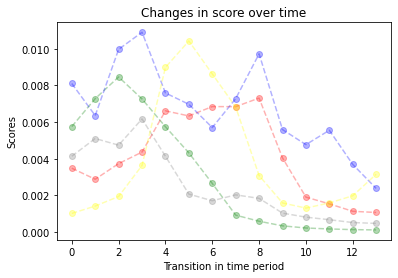

In [83]:
plt.plot(range(0, 14), darleh_scores, 'o--', color='grey', alpha=0.3)
plt.plot(range(0, 14), wohn_scores, 'o--', color='green', alpha=0.3)
plt.plot(range(0, 14), gemeinnuetz_scores, 'o--', color='red', alpha=0.3)
plt.plot(range(0, 14), miet_scores, 'o--', color='blue', alpha=0.3)
plt.plot(range(0, 14), neubaut_scores, 'o--', color='yellow', alpha=0.3)

plt.title("Changes in score over time")
plt.xlabel("Transition in time period")
plt.ylabel("Scores")
plt.show()

## Corpus Measures

TODO: Frequencies, prevelance, word embeddings.

In [21]:
docs = {}

In [22]:
with open('yearbooks_tibble_all.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        year, page, term, count, decade, total = row
        if (year, page) not in docs:
            docs[(year, page)] = []
        if (year, page) in docs:
            docs[(year, page)].append(term)   

In [23]:
del docs[('year', 'page')]

In [24]:
timed_docs = [[], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [25]:
for doc in docs:
    year, page = doc
    if int(year) >= 1870 and int(year) <=1880:
        timed_docs[0].append(docs[doc])
    if int(year) >= 1881 and int(year) <=1895:
        timed_docs[1].append(docs[doc])
    if int(year) >= 1896 and int(year) <=1902:
        timed_docs[2].append(docs[doc])
    if int(year) >= 1903 and int(year) <=1908:
        timed_docs[3].append(docs[doc])
    if int(year) >= 1909 and int(year) <=1913:
        timed_docs[4].append(docs[doc])
    if int(year) >= 1918 and int(year) <=1935:
        timed_docs[5].append(docs[doc])
    if int(year) >= 1946 and int(year) <=1954:
        timed_docs[6].append(docs[doc])
    if int(year) >= 1955 and int(year) <=1959:
        timed_docs[7].append(docs[doc])
    if int(year) >= 1960 and int(year) <=1964:
        timed_docs[8].append(docs[doc])
    if int(year) >= 1965 and int(year) <=1968:
        timed_docs[9].append(docs[doc])
    if int(year) >= 1969 and int(year) <=1979:
        timed_docs[10].append(docs[doc])
    if int(year) >= 1980 and int(year) <=1989:
        timed_docs[11].append(docs[doc])
    if int(year) >= 1990 and int(year) <=1996:
        timed_docs[12].append(docs[doc])
    if int(year) >= 1997 and int(year) <=2009:
        timed_docs[13].append(docs[doc])

In [26]:
final_docs = []
times = []

In [27]:
for period in timed_docs:
    times.append(len(period))
    for doc in period:
        final_docs.append(doc)

In [12]:
from gensim.models import LdaSeqModel
from gensim.corpora import Dictionary

In [28]:
all_words_freqs = {}

In [29]:
for page in docs:
    for word in docs[page]:
        if word not in all_words_freqs:
            all_words_freqs[word] = 0
        if word in all_words_freqs:
            all_words_freqs[word] += 1

In [30]:
all_words_freqs = dict(sorted(all_words_freqs.items(), key=lambda item: item[1], reverse=True))

In [39]:
len(all_words_freqs)

180385

In [40]:
sorted_words = list(all_words_freqs.keys())[0:18000]

In [41]:
time_period_word_frequencies = {}

In [42]:
i = 0

In [43]:
for docs in timed_docs:
    time_period_word_frequencies[i] = {}
    for word in sorted_words:
        time_period_word_frequencies[i][word] = 0
    for doc in docs:
        for word in sorted_words:
            if word in doc:
                time_period_word_frequencies[i][word] += 1
    i += 1

In [92]:
dictionary = Dictionary(final_docs)
corpus = [dictionary.doc2bow(text) for text in final_docs]

## Topic Model Analysis

In [102]:
document_to_topics = {}

In [105]:
for doc in docs:
    document_to_topics[doc] = ldaseq_fast[dictionary.doc2bow(docs[doc])]

In [108]:
import pickle

In [109]:
with open('document_to_topics.pkl', 'wb') as f:
    pickle.dump(document_to_topics, f)

## Frequencies

### Word Embeddings

In [93]:
from gensim.models import Word2Vec

In [94]:
w2vmodel_all = Word2Vec(
        final_docs,
        vector_size=100,
        window=5)

In [95]:
search_words = ["foerder", "wohnbaufoerder", "gemeinnuetz", "neubaut", 
                "fond", "miet", "darleh", "gefoerdert", "antraeg", "stadterneuer"] 

In [97]:
for word in search_words:
    print(word)
    print(w2vmodel_all.wv.most_similar(word))
    print("\n")

foerder
[('fluechtling', 0.9868788719177246), ('fliess', 0.9867823719978333), ('flurenpolizei', 0.9827470779418945), ('foerdert', 0.9809298515319824), ('finanzverwalt', 0.9787901639938354), ('fluechtig', 0.9787065386772156), ('flasch', 0.9784049987792969), ('feuerungstechn', 0.9783715009689331), ('formal', 0.9779160022735596), ('firm', 0.9775443077087402)]


wohnbaufoerder
[('wohn', 0.9854357838630676), ('wohnhaus', 0.9793539047241211), ('wohnbau', 0.9689364433288574), ('wiederinstandsetz', 0.9601736664772034), ('wirtschaftsministerium', 0.9593070149421692), ('wohnhausanlag', 0.9586612582206726), ('wohnbauaktion', 0.9579060077667236), ('wohnbaut', 0.9574611783027649), ('wohnbarack', 0.9549275636672974), ('wohnbauforsch', 0.9537907242774963)]


gemeinnuetz
[('gend', 0.9726683497428894), ('geistlich', 0.9704797267913818), ('gemeindegut', 0.9684017300605774), ('gemischt', 0.9659497737884521), ('gemeindevermoeg', 0.9647831916809082), ('geldportion', 0.9646719098091125), ('gemeindebezirk', 

TODO:

- document to topic loadings for each columns -> year, page, 32 topics
- topic changes over time columns are topics, rows are that time period change
- word scores change over time, columns are words, rows are that time period change
- rank changes for words, for topic 21

In [187]:
list(document_to_topics.keys())[0:10]

[('1870', '1'),
 ('1870', '100'),
 ('1870', '101'),
 ('1870', '102'),
 ('1870', '103'),
 ('1870', '104'),
 ('1870', '105'),
 ('1870', '107'),
 ('1870', '108'),
 ('1870', '109')]

In [188]:
document_to_topics[('1870', '100')]

array([0.00081169, 0.08320083, 0.00081169, 0.00081169, 0.08388154,
       0.00081169, 0.00081169, 0.00081169, 0.00081169, 0.00081169,
       0.00081169, 0.00081169, 0.00081169, 0.31452892, 0.00081169,
       0.00081169, 0.00081169, 0.00081169, 0.00081169, 0.00081169,
       0.00081169, 0.08408892, 0.00081169, 0.00081169, 0.00081169,
       0.00081169, 0.00081169, 0.00081169, 0.00081169, 0.00081169,
       0.00081169, 0.41238419])

In [235]:
with open('document_to_topics.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for document in document_to_topics:
        year, page = document
        topics = document_to_topics[document]
        writer.writerow([year, page, topics])

In [250]:
# change here to include all time periods in a single file
def topics_to_csv(model, name_file, times=14):
    with open(name_file, 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile)
        for time in range(0, times):
            spamwriter.writerow(["Topic Number for time period " + str(time) , "Word, Probability"])
            topics = model.print_topics(time=time, top_terms=30)
            for num, topic in enumerate(topics):
                topic.insert(0, num)
                spamwriter.writerow(topic)
                

In [251]:
topics_to_csv(ldaseq_fast, "all_topics_times.csv")